In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
# Import the data
mov = pd.read_csv('Section6-HW-Dataset.csv', encoding = 'latin1')

In [56]:
# Explore the dataset
mov.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [57]:
#Rename columns
mov.columns = ['DayOfWeek', 'Director', 'Genre', 'MovieTitle', 'ReleaseDate', 'Studio', 'AdjustedGrossMillions', 'BudgetMillions', 'GrossMillions', 'IMDbRating', 'MovieLensrating', 'OverseasMillions', 'Overseas%', 'ProfitMillions', 'Profit%', 'RuntimeMinutes', 'USMillions', 'USGross%']

In [58]:
mov.head()

,DayOfWeek,Director,Genre,MovieTitle,ReleaseDate,Studio,AdjustedGrossMillions,BudgetMillions,GrossMillions,IMDbRating,MovieLensrating,OverseasMillions,Overseas%,ProfitMillions,Profit%,RuntimeMinutes,USMillions,USGross%
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [59]:
mov.describe()

,BudgetMillions,IMDbRating,MovieLensrating,Overseas%,Profit%,RuntimeMinutes,USMillions,USGross%
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [60]:
#Check variable type
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
DayOfWeek                608 non-null object
Director                 608 non-null object
Genre                    608 non-null object
MovieTitle               608 non-null object
ReleaseDate              608 non-null object
Studio                   608 non-null object
AdjustedGrossMillions    608 non-null object
BudgetMillions           608 non-null float64
GrossMillions            608 non-null object
IMDbRating               608 non-null float64
MovieLensrating          608 non-null float64
OverseasMillions         608 non-null object
Overseas%                608 non-null float64
ProfitMillions           608 non-null object
Profit%                  608 non-null float64
RuntimeMinutes           608 non-null int64
USMillions               608 non-null float64
USGross%                 608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ KB


In [61]:
#Count unique values of relevant columns
mov.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [62]:
mov.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [63]:
#Filtering: first according to genre, then the already filtered data according to Studios. 
#Only selected genre and studios are required to be visualized.
#genfilt = mov[(mov.Genre == 'action') | (mov.Genre == 'comedy') | (mov.Genre == 'adventure') | (mov.Genre == 'animation') | (mov.Genre == 'drama')]

In [64]:
#studiofilt = genfilt[(genfilt.Studio == 'Buena Vista Studios') | (genfilt.Studio == 'Sony') | (genfilt.Studio == 'Universal') | (genfilt.Studio == 'WB') | (genfilt.Studio == 'Paramount Pictures') | (genfilt.Studio == 'Fox')]

In [65]:
#Check if filters worked
#print(studiofilt.Genre.unique())
#print(studiofilt.Studio.unique())
#print(len(studiofilt))

In [66]:
#I don't know why this did not work, so I follow an other path - it seemed working but on the chart data were not filtered
genre_filter = ['action', 'comedy', 'animation', 'adventure', 'drama']
mov_filter1 = mov[mov.Genre.isin(genre_filter)]

studio_filter = ['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']
mov_filter2 = mov_filter1[mov_filter1.Studio.isin(studio_filter)]

In [69]:
#Check if filters worked
print(mov_filter2.Genre.unique())
print(mov_filter2.Studio.unique())
print(len(mov_filter2))

['action' 'comedy' 'adventure' 'animation' 'drama']
['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']
423


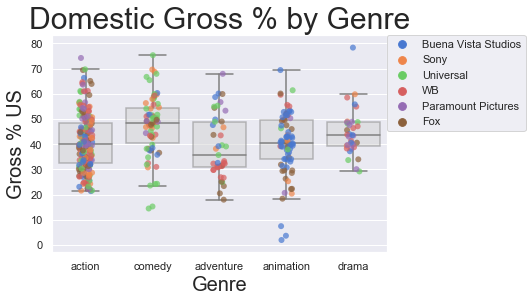

In [70]:
#Create chart
#Define style
sns.set(style="darkgrid", palette="muted", color_codes=True)

#Plot the boxsplots
ax = sns.boxplot(data=mov_filter2, x='Genre', y='USGross%', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

#Add in points to show each observation
sns.stripplot(x='Genre', y='USGross%', data=mov_filter2, jitter=True, size=6, linewidth=0, hue = 'Studio', alpha = 0.7)

#Add title and labels
ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()